<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Topic 7: Basics of Data Visualization  </h2> 


_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - May 2017._

In [56]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

En la presente actividad simularemos y visualizaremos un sistema dinámico 2-dimensional simple. Para ello resolveromos una EDO numéricamente, utilizando el _método de Euler_. 

Consideremos un sistema de $N$ partículas $(x_i(t), y_i(t))$ en el dominio $[0,1]\times[0,1]$, cuyo movimiento se rige por las siguientes ecuaciones (EDOs autónomas):

\begin{align}
\frac{dx}{dt} &= \text{tanh}(x^2+y^2), \text{ con } x(0)=x_0, \\
\frac{dy}{dt} &= \text{tanh}(x^2+y^2), \text{ con } y(0)=y_0 \\
\end{align}

El _método de Euler_ para resolver este problema numéricamente, consiste en realizar la siguiente aproximación para la derivada:

\begin{align}
\frac{x_{i+1}-x_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow x_{i+1} = x_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2) \\
\frac{y_{i+1}-y_i}{\Delta t} =  \text{tanh}(x_i^2+y_i^2) \rightarrow y_{i+1} = y_i + \Delta t \cdot \text{tanh}(x_i^2+y_i^2)
\end{align}

ocupando las condiciones iniciales $x_0$ e $y_0$ como puntos de partida. Aquí $\Delta t$ (_time step_) es un parámetro definido por usted, y usualmente toma valores pequeños.

__Notar__ que esta ecuación es válida para una partícula, y por tanto para simular un sistema de $N$ de estas, es necesario realizar esta actualización para cada partícula $(x_i,y_i)$ con $i \in [1,N]$.

__Se solicita que realice lo siguiente__:
1. Genere un conjunto de `100` puntos aleatoriamente distribuidos en el espacio $[0,1]\times[0,1]$ (Seran usados como posiciones iniciales del sistema). Grafíque el conjunto de puntos obtenidos.
2. Realizar un gráfico de la función que define el comportamiento del sistema: $f(z) = \text{tanh}(z^2)$ (gráfico unidimensional).
3. Desarrollar la función `simular(x0, y0, dt, tf)` que reciba los `np.ndarray` con las coordenadas iniciales `x0` e `y0` del sistema, el _time step_ `dt` (seleccione un valor pequeño $\sim 0.01$) y el tiempo final de simulación. Esta función debe graficar el conjunto de puntos del sistema, en su tiempo final.
4. Usando `interact` desarrolle un _widget_ para visualizar interactivamente distintos estados finales del sistema (distintos `tf`).

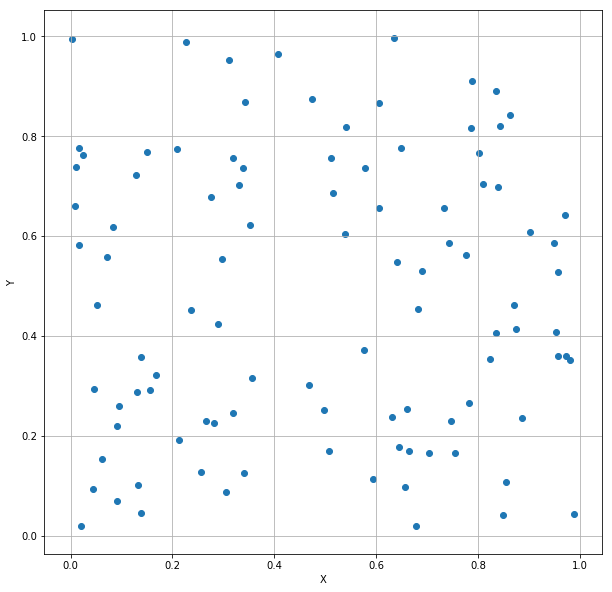

In [57]:
#ACTIVIDAD MAXIMILIANO BOMBIN SANHUEZA

#1-POSICIONES INICIALES

x = np.random.rand(100)
y = np.random.rand(100)

plt.figure(figsize=(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.scatter(x,y)
plt.show()

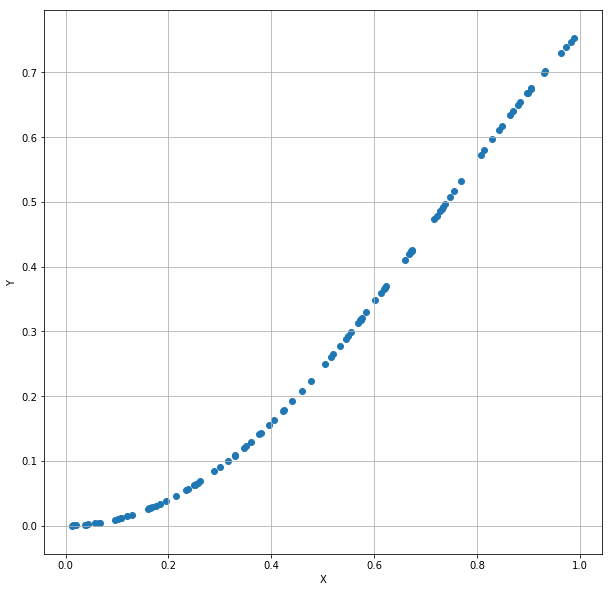

In [58]:
#2-GRÁFICO FUNCIÓN F(z) = tanh(z^2)

def f(z):
    return np.tanh(z**2)

z = np.random.rand(100)

plt.figure(figsize=(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

plt.scatter(z,f(z))
plt.show()

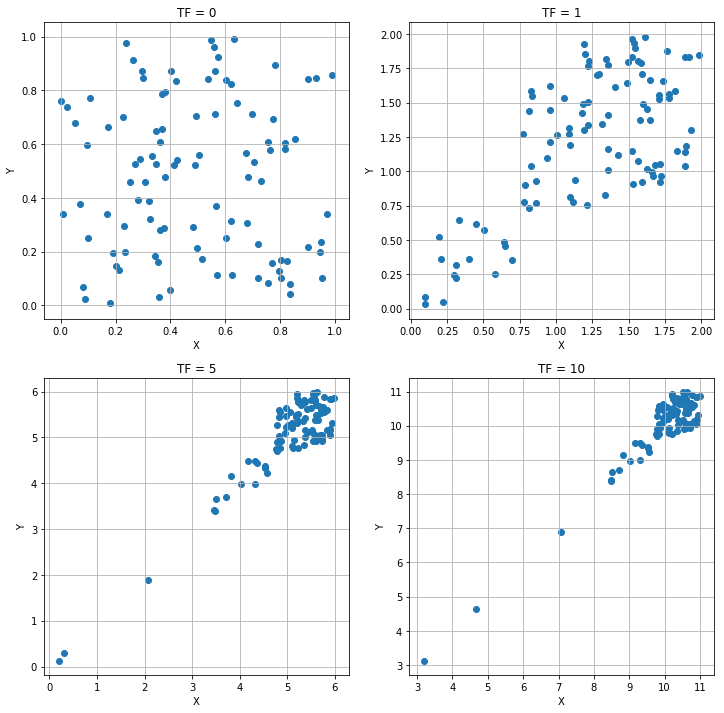

In [65]:
#FUNCIÓN "SIMULAR"

def simular_sin_pltshow(x0, y0, dt, tf):
    count = 0
    
    while(count < tf):
        avance = dt * np.tanh(x0**2 + y0**2)
        
        x0 = x0 + avance
        y0 = y0 + avance
        
        count = count + dt
        
    plt.xlabel("X")
    plt.ylabel("Y")   
    plt.grid()
    plt.scatter(x0,y0)
    
def simular(x0, y0, dt, tf):
    count = 0
    
    while(count < tf):
        avance = dt * np.tanh(x0**2 + y0**2)
        
        x0 = x0 + avance
        y0 = y0 + avance
        
        count = count + dt
     
    plt.title("Posición Partículas en función del tiempo")
    plt.xlabel("X")
    plt.ylabel("Y")   
    plt.grid()
    plt.scatter(x0,y0)
    
    plt.show()
        

        
x0 = np.random.rand(100)
y0 = np.random.rand(100)
dt = 0.01

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.xlabel("X")
plt.ylabel("Y")   
plt.grid()
plt.scatter(x0,y0)
plt.title("TF = 0")

plt.subplot(2,2,2)
simular_sin_pltshow(x0, y0, dt, 1)
plt.title("TF = 1")

plt.subplot(2,2,3)
simular_sin_pltshow(x0, y0, dt, 5)
plt.title("TF = 5")

plt.subplot(2,2,4)
simular_sin_pltshow(x0, y0, dt, 10)
plt.title("TF = 10")

plt.show()

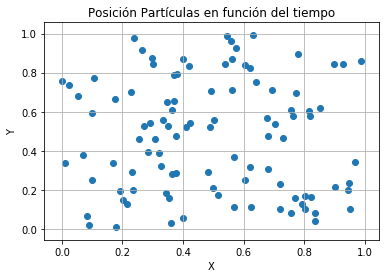

In [66]:
#4-INTERACT

from ipywidgets import interact
from ipywidgets import fixed
from ipywidgets import IntSlider, FloatSlider

interact(simular, x0=fixed(x0), y0=fixed(y0), dt=fixed(0.01), tf=(0,5,0.01))